In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
loc = 0.5
scale= 0.3**0.5
n=4
x1 = np.arange(-4, n+1)
y1= norm.cdf(x1, loc=loc, scale=scale)#теоретична  функція ймовірності - значення в точках з х1
plt.plot(x1, y1)
norm_rvs =norm.rvs(loc=loc, scale=scale, size=1000)
my_list=[]

for i in x1:
    my_list.append(sum((norm_rvs)<i))
#print(my_list)
emp_cdf=np.array(my_list)/1000
#print(emp_cdf)

plt.plot(x1,emp_cdf, 'r')
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
print('емпірична медіана', np.sort(norm_rvs)[500])
print ('емпіричний нижній квартиль', np.sort(norm_rvs)[250])
print ('емпіричний верхній квартиль', np.sort(norm_rvs)[750])
print('теоретична медіана',  norm.ppf(0.5, loc=loc, scale=scale))
print( 'теоретичний нижній квартиль', norm.ppf(0.25, loc=loc, scale=scale))
print( 'теоретичний верхній квартиль', norm.ppf(0.75, loc=loc, scale=scale))

емпірична медіана 0.46498401391255806
емпіричний нижній квартиль 0.11118140054452791
емпіричний верхній квартиль 0.8711153079133319
теоретична медіана 0.5
теоретичний нижній квартиль 0.13056674901158155
теоретичний верхній квартиль 0.8694332509884184


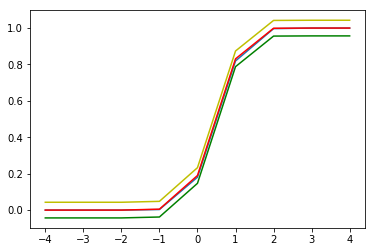

In [3]:
#рахуємо та будуємо графічно довірчий інтервал
def F_empir (x):
    return(sum(x>norm_rvs)/1000)
y3=[]
y4=[]
xp=1.36/(1000**0.5)
for i in x1:
    y3.append (F_empir (i)-xp)
    y4.append (F_empir (i)+xp)
y3=np.array(y3)
y4=np.array(y4)  
plt.plot(x1, y1)#будуєм синім графік теоретичної функції ймовірності 
plt.plot(x1,emp_cdf, 'r')#будуєм червоним графік емпіричної функції ймовірності (майже накладається на графік теоретичної)
plt.plot(x1,y3, 'g')#будуєм зеленим нижню межу довірчого інтервалу
plt.plot(x1,y4, 'y')#будуєм жовтим верхню межу довірчого інтервалу
plt.show()